# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 4.4: Convolução 2D - Filtrando imagens

In [35]:
import math as m
import time
import numpy as np
import scipy.signal as sig
from imageio.v3 import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from urllib.request import urlopen

### Revisão: Convolução 1D

Vimos que a *filtragem por convolução* corresponde a computar um sinal $y$ a partir de um sinal $x$ através da equação de convolução $y=h*x$, ou seja,
$$y_n = \sum_{m}h_mx_{n-m}.$$

Na equação acima, onde os limites do somatório foram propositalmente omitidos, podemos ver que cada amostra $y_n$ é produzida como uma *combinação linear* de amostras de $x$ de forma *invariante no tempo*, ou seja, os coeficientes $h_0,h_1,h_2,\ldots$ da combinação linear são aplicados respectivamente às amostras da entrada $x_n,x_{n-1},x_{n-2},\ldots$, de forma fixa em uma relação às posições relativas do sinal no tempo; se $n$ representa o "tempo atual", então:
$$\begin{array}{ll}
h_0&\mbox{multiplica a amostra atual}\\
h_1&\mbox{multiplica a última amostra}\\
h_2&\mbox{multiplica a penúltima amostra}\\
\vdots&\vdots
\end{array}$$

Não é difícil provar a partir da equação do filtro por convolução que o mapa $x\mapsto \mathcal{H}(x)=h*x$ é

1. **linear:**

$$\mathcal{H}(\alpha x+\beta w) = \alpha\mathcal{H}(x)+\beta\mathcal{H}(w)$$

2. **invariante no tempo:**

$$\begin{array}{l}
\mbox{se}\ y=\mathcal{H}(x)\ \mbox{e}\ w_n=x_{n-\Delta},\ \forall n,\\
\mbox{então}\ z=\mathcal{H}(w)\ \mbox{satisfaz}\ z_n=y_{n-\Delta},\ \forall n.\end{array}$$

Aqui, como em todo o resto desse capítulo, os índices devem ser interpretados "mod N".

### Convolução 2D

Dada uma imagem $x$ queremos calcular a imagem $y$ onde $y_{i,j}$ é uma combinação linear dos pixels de $x$ definida em relação à coordenada $(i,j)$.

**Definição 4.4.1:** A convolução de duas imagens $x, h\in \mathcal{M}_{M,N}(\mathbb{C})$ é a imagem $y=h*x\in\mathcal{M}_{M,N}(\mathbb{C})$ dada por 

\begin{align*}
	y_{i,j} &= \sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1}h_{r,s}x_{i-r,j-s} \\
	&= \sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1}x_{r,s}h_{i-r,j-s} \\
\end{align*}

In [63]:
from scipy.fft import fft2, ifft2
import math

def convolução_circular2d_1(x,h, verbose=False):
    M, N = h.shape
    w = np.zeros((M,N), dtype='complex')
    for i in range(M):
        for j in range(N):
            if verbose: print()
            for r in range(M):
                for s in range(N):
                    w[i][j] += x[r%M][s%N] * h[i-r%M][j-s%N]
                    
                    if verbose:
                        #print(f'w[{i}][{j}] += x[{r}][{s}] * h[{i-r}][{j-s}] \t= {x[r][s]} * {h[i-r][j-s]} = {x[r][s] * h[i-r][j-s]} ')
                        print(f'w[{i}][{j}] += x[.][{s}] * h[{i-r}][.] \t= {x[r][s]} * {h[i-r][j-s]} = {x[r][s] * h[i-r][j-s]} ')
    return w


def convolução_circular2d_2(x, h, times=1):
    X = fft2(x)
    H = fft2(h)
    W = np.multiply(X, H**times)
    w = ifft2(W)
    return w

def test_conv2d_1(M=4,N=5):
    x = np.random.rand(M,N)
    h = np.random.rand(M,N)
    
    golden = convolução_circular2d_1(x,h)
    dut = convolução_circular2d_1(x,h)
    
    assert np.allclose(golden, dut), 'Teste falhou!'
    print('Teste passou')
    
test_conv2d_1(10,23)

Teste passou


**Obs:** considera-se aqui a extensão periódica de todas as imagens, ou seja, $w_{i,j} = w_{i\ \mbox{mod}\ M, j\ \mbox{mod}\ N}\ \ $. Pela periodicidade de $x$ e $h$, podemos sempre re-escrever os somatórios de várias maneiras, por exemplo, $\forall a, b\in\mathbb{Z}$:

\begin{equation*}
	\sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1} x_{r,s}h_{i-r,j-s} = \sum\limits_{r=a}^{a+M-1}\ \ \sum\limits_{s=b}^{b+N-1} x_{r,s}h_{i-r,j-s} = \sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1} x_{r-a,s-b}\ \ h_{i-r+a,j-s+b}.
\end{equation*}

### Propriedades da convolução 2D

1. Linearidade

\begin{equation*}
		x*(\alpha y + \beta z) = \alpha x*y + \beta x*z
\end{equation*}

2. Comutatividade

\begin{equation*}
		x*y = y*x
\end{equation*}

3. Associatividade

\begin{equation*}
		x*(y*z) = (x*y)*z
\end{equation*}

4. Representação Matricial (Exercício 4.24):

\begin{equation*}\mbox{Se}\ h\in\mathcal{M}_{M,N}(\mathbb{C})\ \mbox{é da forma}\ h = lc^T\\
    \mbox{com}\ l\in\mathbb{C}^M\ \mbox{e}\ c\in\mathbb{C}^N,\ \mbox{então}\ x*h = M_l x M_c^T.
\end{equation*}

**Obs:** As provas são análogas ao caso unidimensional, usando duplo somatório.

### Teorema da convolução 2D

**Teorema 4.4.1:** Se $x, h, y\in\mathcal{M}_{M,N}(\mathbb{C})$ e $y=x*h$, então

\begin{equation*}
	Y_{k,l} = X_{k,l}H_{k,l},\quad \forall k=0, 1, \dots, M-1,\quad \forall l = 0, 1, \dots, N-1
\end{equation*}

onde $X, H, Y\in\mathcal{M}_{M,N}(\mathbb{C})$ são as DFT's de $x, h$ e $y$ respectivamente.

### Ação do filtro 2D

Considere um filtro arbitrário definido por uma matriz $h\in\mathcal{M}_{M,N}(\mathbb{C})$ com saída $y=x*h\in\mathcal{M}_{M,N}(\mathbb{C})$:

**Domínio espacial:**
$$x\longrightarrow\begin{array}{|c|}\hline h\\ \hline\end{array}\longrightarrow y=x*h$$

$$$$

**Domínio da Frequência:**

$$X\longrightarrow\begin{array}{|c|}\hline H\\ \hline\end{array}\longrightarrow Y=X\circ H$$

**Em outras palavras**, a operação de convolução de matrizes no domínio do espaço equivale ao produto de Hadamard das correspondentes DFTs.

### Efeito de um filtro de convolução em uma exponencial complexa

Considere um filtro $h$ aplicado em uma forma de onda básica $x=E_{k,l}$. Por construção,

$$X_{k,l} = \left(x,E_{k,l}\right) = MN\quad\quad\mbox{e}\quad\quad X_{r,s}=0,\ \forall(r,s)\neq(k,l).$$

Pelo teorema da convolução, $y=x*h$ satisfaz
$$Y_{r,s} = H_{r,s}X_{r,s};$$

logo

$$Y_{k,l} = MNH_{k,l}\quad\quad\mbox{e}\quad\quad Y_{r,s}=0,\ \forall(r,s)\neq(k,l).$$

In [21]:

def EE(m,n):
    res = np.zeros((m,n,m,n), dtype='complex')
    for k in range(m):
        for l in range(n):
            for r in range(m):
                for s in range(n):
                    res[k][l][r][s] = np.exp(1j*2*math.pi*(k*r/m + l*s/n))
    return res

def test_conv2d_2(M=4,N=3):
    base = EE(M,N)
    h = np.random.rand(M,N)
    H = fft2(h)
    
    for i in range(M):
        for j in range(N):
            x = base[i][j]
            dut = convolução_circular2d_1(x,h)
            golden = H[i][j] * base[i][j]
    
            assert np.allclose(golden, dut), 'Teste falhou!'
    print('Teste passou!')
    
test_conv2d_2(5,7)

Teste passou!


Pela equação de síntese de $y$,

\begin{align*}
	y &= \frac{1}{MN}\sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1} Y_{r,s}E_{r,s} \\
	&= \frac{1}{MN}Y_{k,l}E_{k,l} \\
	&= \frac{1}{MN}(MNH_{k,l})E_{k,l} \\
    &= H_{k,l}E_{k,l}\\
	&= H_{k,l}x
\end{align*}

**Em outras palavras**, se a entrada do filtro é uma forma básica de onda de frequência $(k,l)$, a saída é a mesma forma básica de onda multiplicada pelo escalar $H_{k,l}$.

Se denotamos a convolução $x*h$ como um operador linear

\begin{equation*}
	\varphi_h: \mathcal{M}_{M,N}(\mathbb{C})\rightarrow\mathcal{M}_{M,N}(\mathbb{C})
\end{equation*}

definido como $\varphi_h(x) = x*h$, então a propriedade anterior pode ser expressa como

$$\varphi_h(E_{k,l}) = H_{k,l}E_{k,l},\ \forall k,l,$$

de onde podemos dizer que

\begin{equation*}
	E_{k,l}\in\mathcal{M}_{M,N}(\mathbb{C})
\end{equation*}

são **autovetores** de $\varphi_h, \forall k, l$, com respectivos **autovalores** dados por $H_{k,l}$.

### Seção 4.4.2: Aplicações da convolução 2D e filtragem

**Exemplo:** filtro da média 2D com 9 "taps"

\begin{align*}
	y_{i,j} &= \frac{1}{9}\left(x_{i-1,j-1} + x_{i-1,j} + x_{i-1,j+1} + x_{i,j-1} + x_{i,j} + x_{i,j+1} + x_{i+1,j-1} + x_{i+1,j} + x_{i+1,j+1}\right)
\end{align*}

ou equivalentemente

\begin{equation*}
	y = x*h
\end{equation*}

onde $$\begin{pmatrix}
    h_{-1,-1}&h_{-1,0}&h_{-1,1}\\
    h_{0,-1}&h_{0,0}&h_{0,1}\\
    h_{1,-1}&h_{1,0}&h_{1,1}\\
    \end{pmatrix} = 
    \begin{pmatrix}
    \frac{1}{9}&\frac{1}{9}&\frac{1}{9}\\
    \frac{1}{9}&\frac{1}{9}&\frac{1}{9}\\
    \frac{1}{9}&\frac{1}{9}&\frac{1}{9}\\
    \end{pmatrix}\quad\quad\mbox{e}\quad\quad h_{r,s}=0,\ \forall r,s\neq -1,0,1.$$

A DFT de $h$ é

\begin{array}{lll}
	H_{k,l} &= &\sum\limits_{r=0}^{M-1}\sum\limits_{s=0}^{N-1}h_{r,s}e^{-i2\pi(kr/M + ls/N)} \\
	&= &\frac{1}{9}\left(e^{-i2\pi(-k/M - l/N)} + e^{-i2\pi(-k/M)} + e^{-i2\pi(-k/M + l/N)}\right. \\
	&&+ e^{-i2\pi(-l/N)} + 1 + e^{-i2\pi(l/N)} \\
	&&\left.+ e^{-i2\pi(k/M - l/N)} + e^{-i2\pi k/M} + e^{-i2\pi(k/M + l/N)}\right)
\end{array}

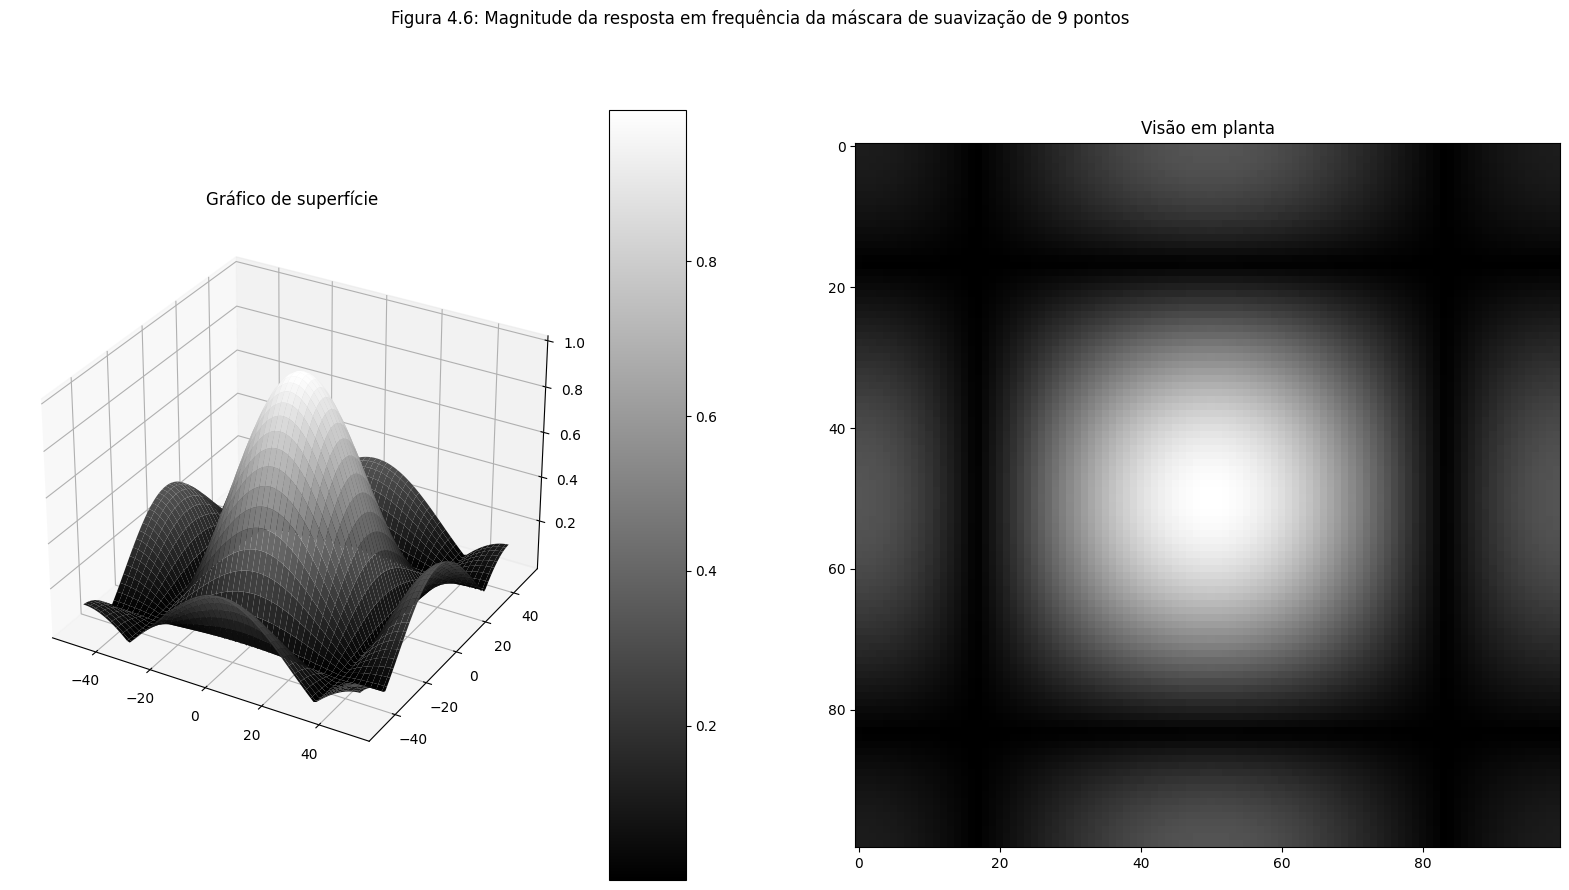

In [32]:
def cria_filtro_da_media(M,N):
    h = np.zeros((M,N))
    # Cria um bloco 3x3 centralizado em (0,0) 
    for j in range(-1,2):
        for k in range(-1,2):
            h[j%M,k%N] = 1/9
    return h
def cria_meshgrid(M,N):
    x = np.arange(-M//2+1,M//2+1)
    y = np.arange(N//2,-N//2,-1)
    return np.meshgrid(x,y)
    

M = N = 100
h = cria_filtro_da_media(M,N)

# Espectro do filtro
H = np.fft.fft2(h)
f = np.abs(np.fft.fftshift(H))

# Duas visualizações alternativas para a DFT.
fig = plt.figure(figsize=(20,10));

# 1. Imagem 3D - Superfície
x,y = cria_meshgrid(M,N)
ax = fig.add_subplot(1, 2, 1, projection='3d')
s = ax.plot_surface(x,y,f,cmap='binary_r');
ax.set_title("Gráfico de superfície");
fig.colorbar(s, shrink=1.0, aspect=10)

# Imagem 2D
ax = fig.add_subplot(1, 2, 2);
ax.imshow(abs(np.fft.fftshift(H)),cmap='binary_r');
ax.set_title("Visão em planta")
fig.suptitle("Figura 4.6: Magnitude da resposta em frequência da máscara de suavização de 9 pontos")
plt.show()

## Figuras 4.7 e 4.8: Uma imagem "original", uma versão ruidosa, e duas versões filtradas

In [19]:
# função auxiliar
def rgb2gray(rgb):
    fil = [0.299, 0.587, 0.144]
    return np.dot(rgb, fil)

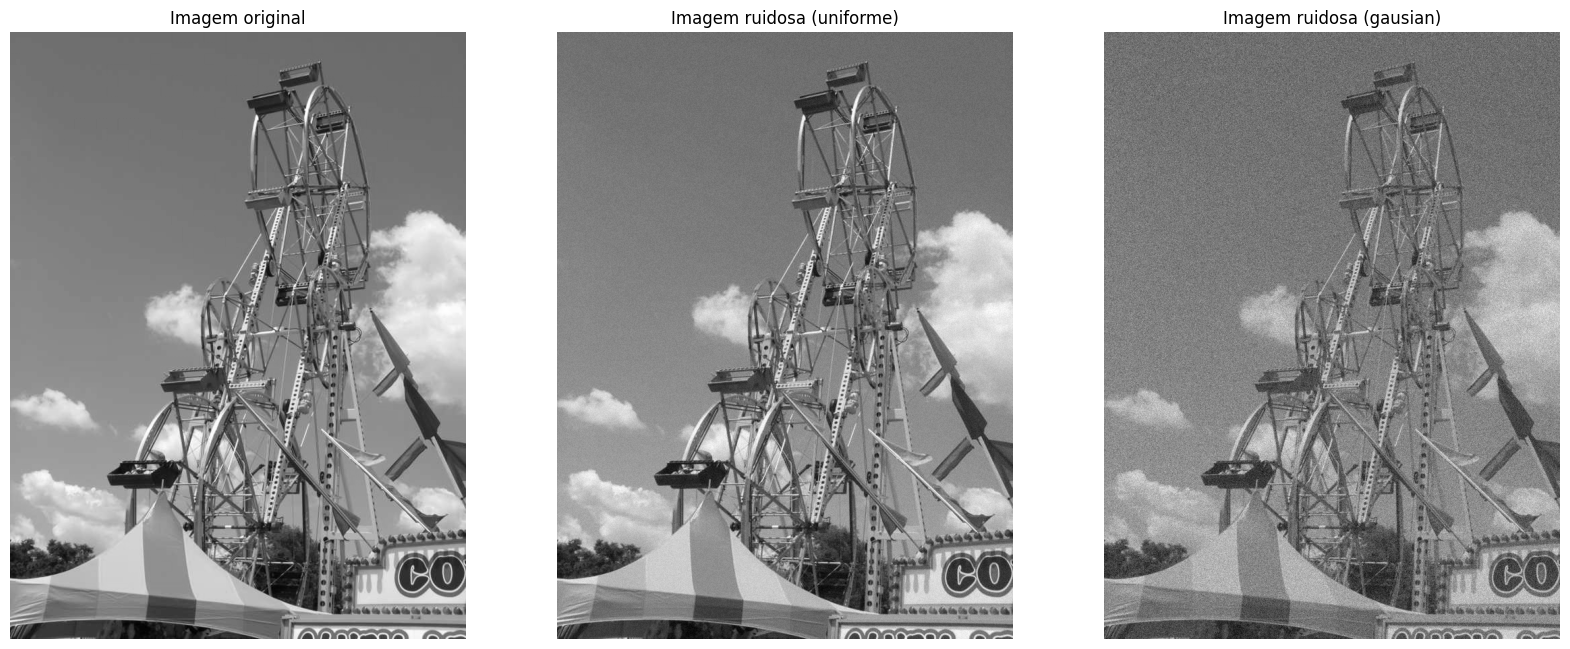

In [47]:
# Carrega a imagem da internet e converte para nível de cinza
url = "http://sutherncharm.files.wordpress.com/2009/09/double-ferris.jpg"
M = rgb2gray(imread(url));
S=M.shape
fig, ax = plt.subplots(1, 3, figsize=(20,10));
ax[0].imshow(M, cmap='gray');
ax[0].set_title("Imagem original");
ax[0].axis("off");

def add_noise(src_image, type='gausian'):
    if type == 'gausian':
        return src_image + 20*(np.random.randn(*S))
    else:
        return src_image + 20*(np.random.rand(*S)-0.5)

    
Mnoisy = add_noise(M, type='uniform')
ax[1].imshow(Mnoisy, cmap='gray');
ax[1].set_title("Imagem ruidosa (uniforme)");
ax[1].axis("off");

Mnoisy_gausian = add_noise(M, type='gausian')
ax[2].imshow(Mnoisy_gausian, cmap='gray');
ax[2].set_title("Imagem ruidosa (gausian)");
ax[2].axis("off");

plt.show()

### Aplicação da filtragem usando média de 9 pontos na imagem ruidosa

Os códigos a seguir pretendem ilustrar:

- a aplicação do filtro da média de 9 pontos na imagem ruidosa, para evidenciar seu efeito de redução de ruído;

- a aplicação repetida (10x) do mesmo filtro da média, para evidenciar seu efeito de suavização.

Essas aplicações são realizadas tanto no domínio original/espacial quanto no domínio da frequência, utilizando o teorema da convolução:

$$y=h*x \iff y = \mbox{IDFT}\left(\mbox{DFT}(h)\circ\mbox{DFT}(x)\right).$$

Essas implementações produzem **os mesmos resultados**, porém com custos computacionais diferentes:

- a aplicação do filtro no domínio do tempo se beneficia do fato da equação de convolução ter apenas 9 "taps", o que o torna muito mais eficiente do que a aplicação correspondente do filtro no domínio da frequência;

- o tempo da aplicação iterada no domínio do tempo cresce linearmente com o número de iterações, porém no domínio da frequência tal iteração pode ser abreviada pelo acúmulo (exponenciação) dos coeficientes do filtro, de acordo com:

$$Y_{k,l} = \overbrace{H_{k,l}\cdot H_{k,l}\cdots H_{k,l}}^{L\ \mbox{vezes}}\cdot X_{k,l} = (H_{k,l})^L\cdot X_{k,l}.$$

Tempo da filtragem espacial = 0.03224630000022444 segundos
Tempo de 10 filtragens espaciais = 0.2685609000000113 segundos


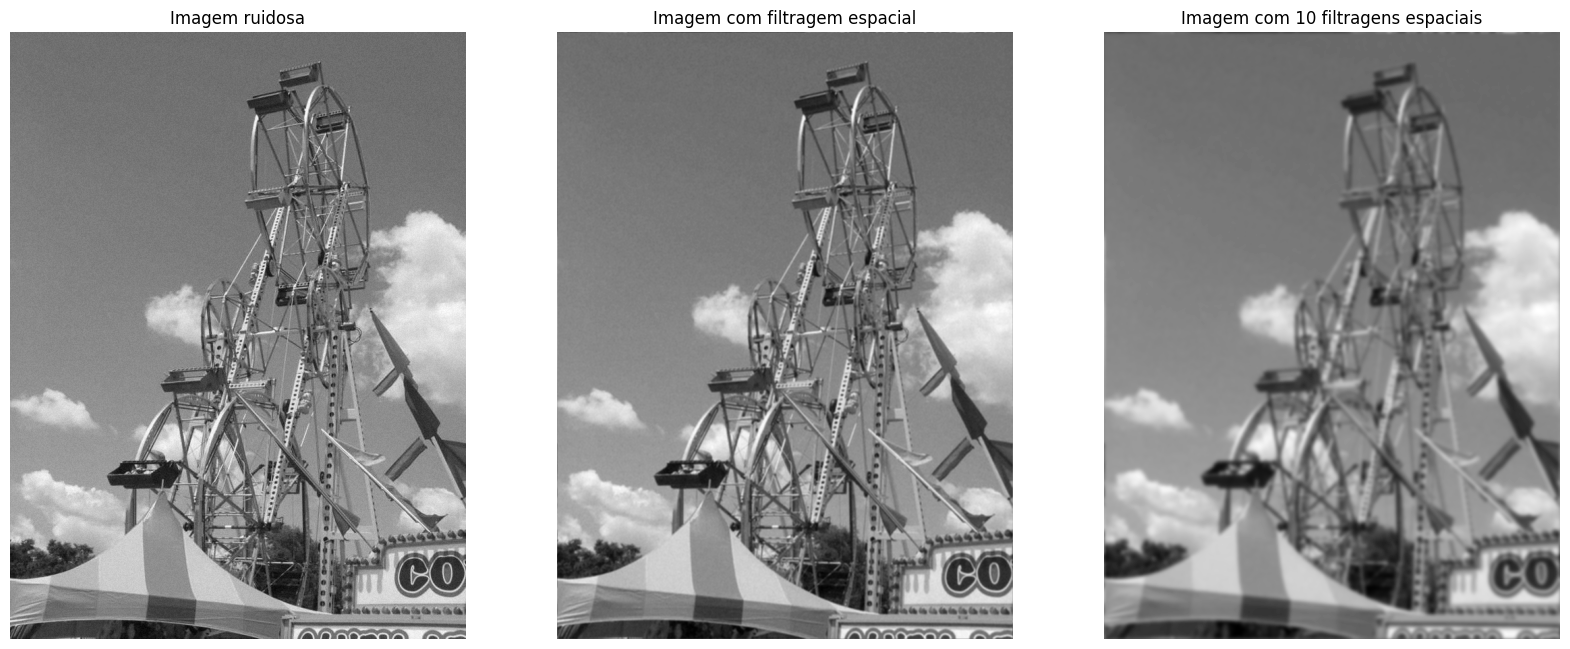

In [50]:
# versão da aula: calculando as convoluções no domínio do tempo
# Define uma máscara 3x3 contendo apenas os "taps" (coeficientes não-nulos) do filtro
d = np.zeros((3,3))
for j in range(-1,2):
    for k in range(-1,2):
        d[j,k] = 1/9
# O código abaixo faz a filtragem no domínio do tempo.
antes = time.perf_counter()
Mdenoised = sig.convolve2d(Mnoisy,d,mode='same', boundary='wrap')
depois = time.perf_counter()
print("Tempo da filtragem espacial =",depois-antes,"segundos")
# Passa a imagem ruidosa 10 vezes no mesmo filtro.
Mdenoised10 = Mnoisy.copy()
antes = time.perf_counter()
for i in range(10):
    Mdenoised10 = sig.convolve2d(Mdenoised10,d,mode='same', boundary='wrap')
depois = time.perf_counter()
print("Tempo de 10 filtragens espaciais =",depois-antes,"segundos")

fig , ax = plt.subplots(1, 3, figsize=(20,12))
ax[0].imshow(Mnoisy, cmap='gray');
ax[0].set_title("Imagem ruidosa");
ax[0].axis("off")

ax[1].imshow(Mdenoised, cmap='gray');
ax[1].set_title("Imagem com filtragem espacial");
ax[1].axis("off")
ax[2].imshow(Mdenoised10, cmap='gray');
ax[2].set_title("Imagem com 10 filtragens espaciais");
ax[2].axis("off")
plt.show()

convolução_circular2d_2
Tempo da filtragem espacial = 0.06283740000071703 segundos
Tempo de 10 filtragens espaciais = 0.07754090000071301 segundos


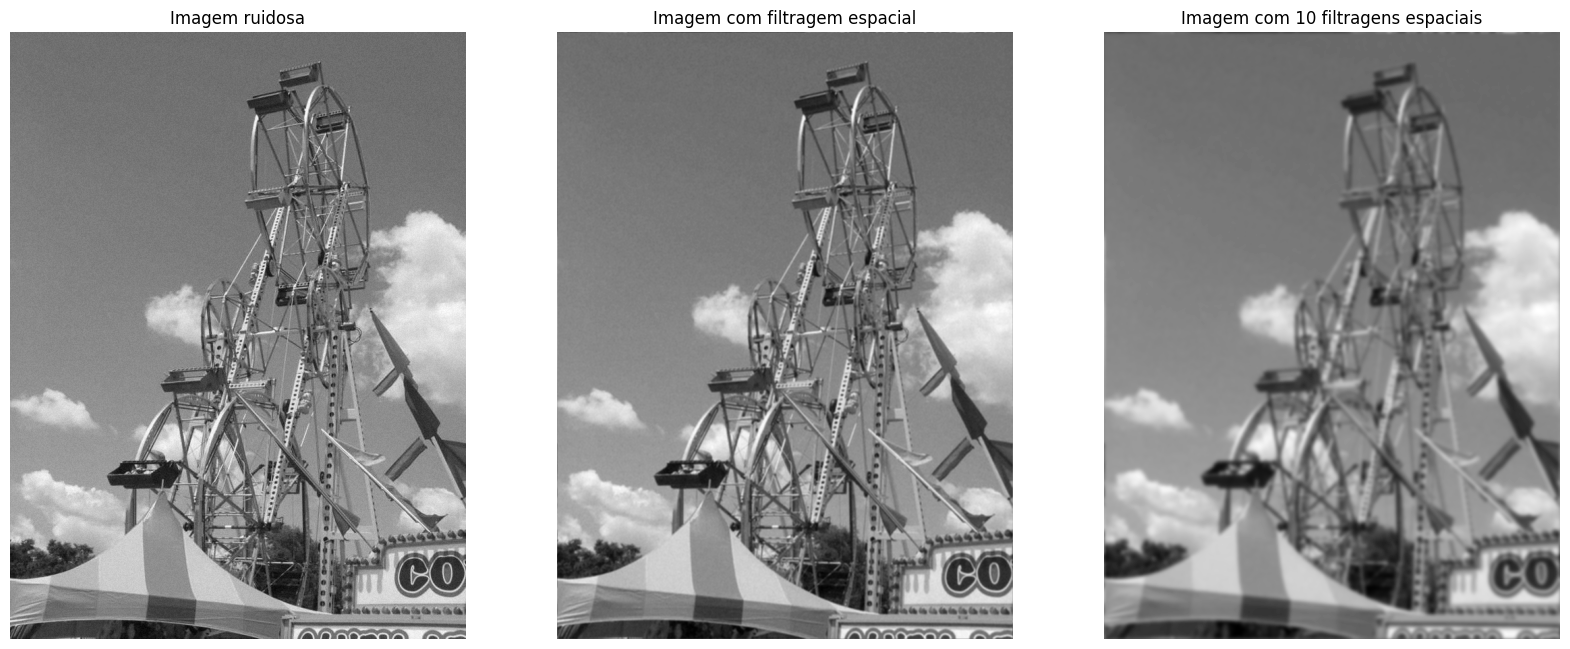

In [64]:
# tentando reproduzir utilizando minha implementação convolução_circular2d_1 e convolução_circular2d_2
def filtro_suavizacao(src_image, conv_func):
    M,N = src_image.shape
    
    h = cria_filtro_da_media(M,N)

    antes = time.perf_counter()
    Mdenoised = conv_func(src_image,h)
    depois = time.perf_counter()
    print("Tempo da filtragem espacial =",depois-antes,"segundos")

    Mdenoised10 = src_image.copy()
    antes = time.perf_counter()
    Mdenoised10 = conv_func(Mdenoised10,h, times=10)
    depois = time.perf_counter()
    print("Tempo de 10 filtragens espaciais =",depois-antes,"segundos")
    
    fig , ax = plt.subplots(1, 3, figsize=(20,12))
    ax[0].imshow(src_image, cmap='gray');
    ax[0].set_title("Imagem ruidosa");
    ax[0].axis("off")

    ax[1].imshow(abs(Mdenoised), cmap='gray');
    ax[1].set_title("Imagem com filtragem espacial");
    ax[1].axis("off")
    ax[2].imshow(abs(Mdenoised10), cmap='gray');
    ax[2].set_title("Imagem com 10 filtragens espaciais");
    ax[2].axis("off")
    plt.show()

print('convolução_circular2d_2')
filtro_suavizacao(Mnoisy, convolução_circular2d_2)
# filtro_suavizacao(Mnoisy, convolução_circular2d_1)



Tempo da filtragem espectral = 0.08791060000021389 segundos
Tempo de 10 filtragens espectrais = 0.08122270000058052 segundos


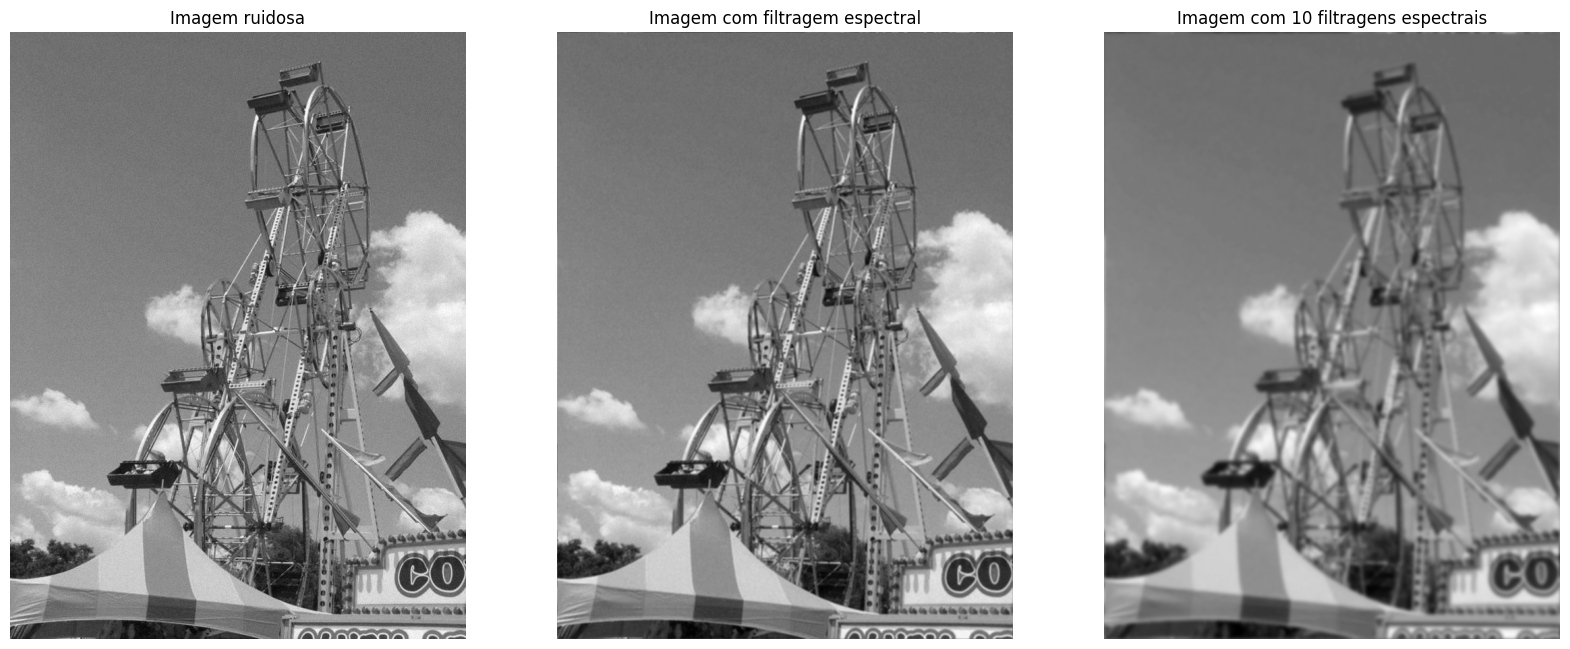

In [66]:
# versão 2: calculando as convoluções no domínio da frequência
# Define a resposta impulsiva do filtro
h = np.zeros(S)
for j in range(-1,2):
    for k in range(-1,2):
        h[j%S[0],k%S[1]] = 1/9
        
# O código abaixo faz a filtragem no domínio da frequência.
antes = time.perf_counter()
Mdenoised = np.real(np.fft.ifft2(np.fft.fft2(Mnoisy)*np.fft.fft2(h)))
depois = time.perf_counter()
print("Tempo da filtragem espectral =",depois-antes,"segundos")
# Passa a imagem ruidosa 10 vezes no mesmo filtro.
antes = time.perf_counter()
Mdenoised10 = np.real(np.fft.ifft2(np.fft.fft2(Mnoisy)*np.fft.fft2(h)**10))
depois = time.perf_counter()
print("Tempo de 10 filtragens espectrais =",depois-antes,"segundos")

fig , ax = plt.subplots(1, 3, figsize=(20,12))
ax[0].imshow(Mnoisy, cmap='gray');ax[0].set_title("Imagem ruidosa");ax[0].axis("off")
ax[1].imshow(Mdenoised, cmap='gray');ax[1].set_title("Imagem com filtragem espectral");ax[1].axis("off")
ax[2].imshow(Mdenoised10, cmap='gray');ax[2].set_title("Imagem com 10 filtragens espectrais");ax[2].axis("off");plt.show()

## Filtro para detecção de bordas

Uma borda de objeto contido em uma imagem $f(x,y)$ corresponde a uma posição onde a cor da imagem varia abruptamente. Por isso, o gradiente $$\nabla f = \begin{pmatrix}
	\frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}
\end{pmatrix}$$ pode ser utilizado para detectar bordas quando $\|\nabla f\| \gg 0$.

Da definição de derivada temos:

\begin{align*}
	\frac{\partial f(x,y)}{\partial x} &= \lim\limits_{\partial\rightarrow 0}\frac{f(x+\partial, y)-f(x,y)}{\partial} \\
	\frac{\partial f(x,y)}{\partial y} &= \lim\limits_{\partial\rightarrow 0}\frac{f(x,y+\partial)-f(x,y)}{\partial} \\
\end{align*}
de onde podemos obter aproximações discretas como
\begin{align*}
	\frac{\partial f(x,y)}{\partial x} & \approx \frac{f(x+\Delta_x, y)-f(x,y)}{\Delta_x} \\
	\frac{\partial f(x,y)}{\partial y} & \approx \frac{f(x,y+\Delta_y)-f(x,y)}{\Delta_y}
\end{align*}
onde $\Delta_x$ é a resolução de amostragem horizontal e $\Delta_y$ é a resolução de amostragem vertical.

### Filtros para detecção de bordas horizontais e bordas verticais

As aproximações discretas da derivada sugerem os seguintes filtros convolucionais para detecção de bordas em imagens:

- **bordas horizontais**

$$\begin{array}{l}y_{i,j} = x_{i+1,j}-x_{i,j},\\ \mbox{ou}\ y=h*x,\\ \mbox{onde}\ h_{0,0}=-1,\ h_{-1,0}=1,\ h_{r,s}=0, \mbox{c.c.}\end{array}$$

- **bordas verticais**

$$\begin{array}{l}z_{i,j} = x_{i,j+1}-x_{i,j},\\ \mbox{ou}\ z=v*x,\\ \mbox{onde}\ v_{0,0}=-1,\ v_{0,-1}=1,\ v_{r,s}=0, \mbox{c.c.}\end{array}$$

Um filtro "genérico" para detecção de bordas poderia ser construído combinando as saídas dos detectores de bordas horizontais e verticais, como:

\begin{equation*}
	B_{i,j} = \sqrt{|y_{i,j}|^2 + |z_{i,j}|^2}
\end{equation*}

In [95]:
def filtro_detectcao_bordas(M,N, tipo='horizontal'):
    h = np.zeros((M,N))
    h[0][0] = 1
    if tipo == 'horizontal': 
        h[1][0] = -1
    elif tipo == 'vertical':
        h[0][1] = -1
    return h
        

width = height = 2
h_hor = filtro_detectcao_bordas(width,height, tipo='horizontal')
h_ver = filtro_detectcao_bordas(width,height, tipo='vertical')
h_combinado = ifft2(fft2(h_hor)*fft2(h_ver))
np.round(h_combinado,2)

array([[ 1.-0.j, -1.+0.j],
       [-1.+0.j,  1.+0.j]])

v=[[ 1. -1.]]


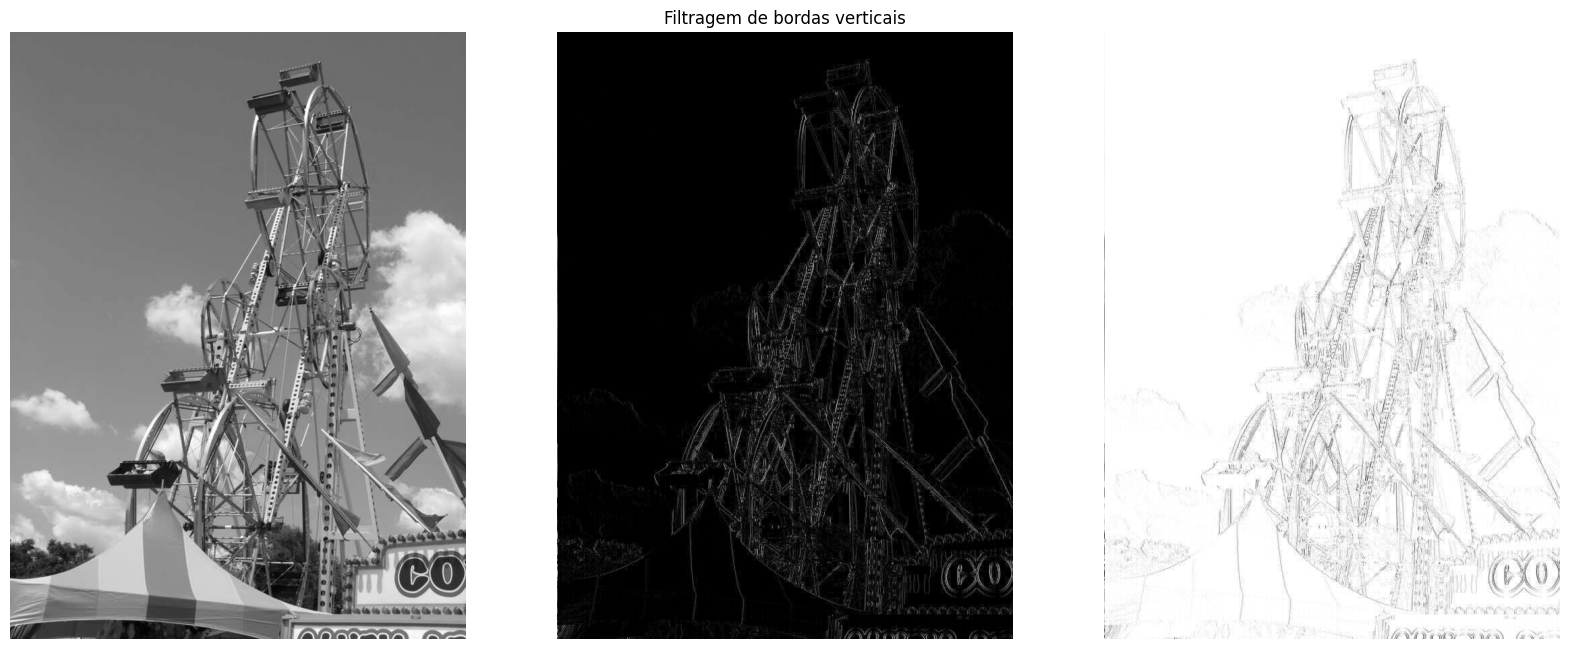

In [97]:
# original da aula
v = np.zeros((1,2));
v[0,0], v[0,1] = 1, -1;

Mver = np.abs(sig.convolve2d(M,v,mode='same', boundary='wrap'));
maximo = np.amax(Mver)
fig, ax = plt.subplots(1, 3, figsize=(20,12));
ax[0].imshow(M, cmap='gray');ax[0].axis("off")
ax[1].imshow(1-Mver/maximo, cmap='gray_r');
ax[1].axis("off")
ax[2].imshow(1-Mver/maximo, cmap='gray');
ax[2].axis("off");
ax[1].set_title("Filtragem de bordas verticais");
plt.show()

h=[[ 1.]
 [-1.]]


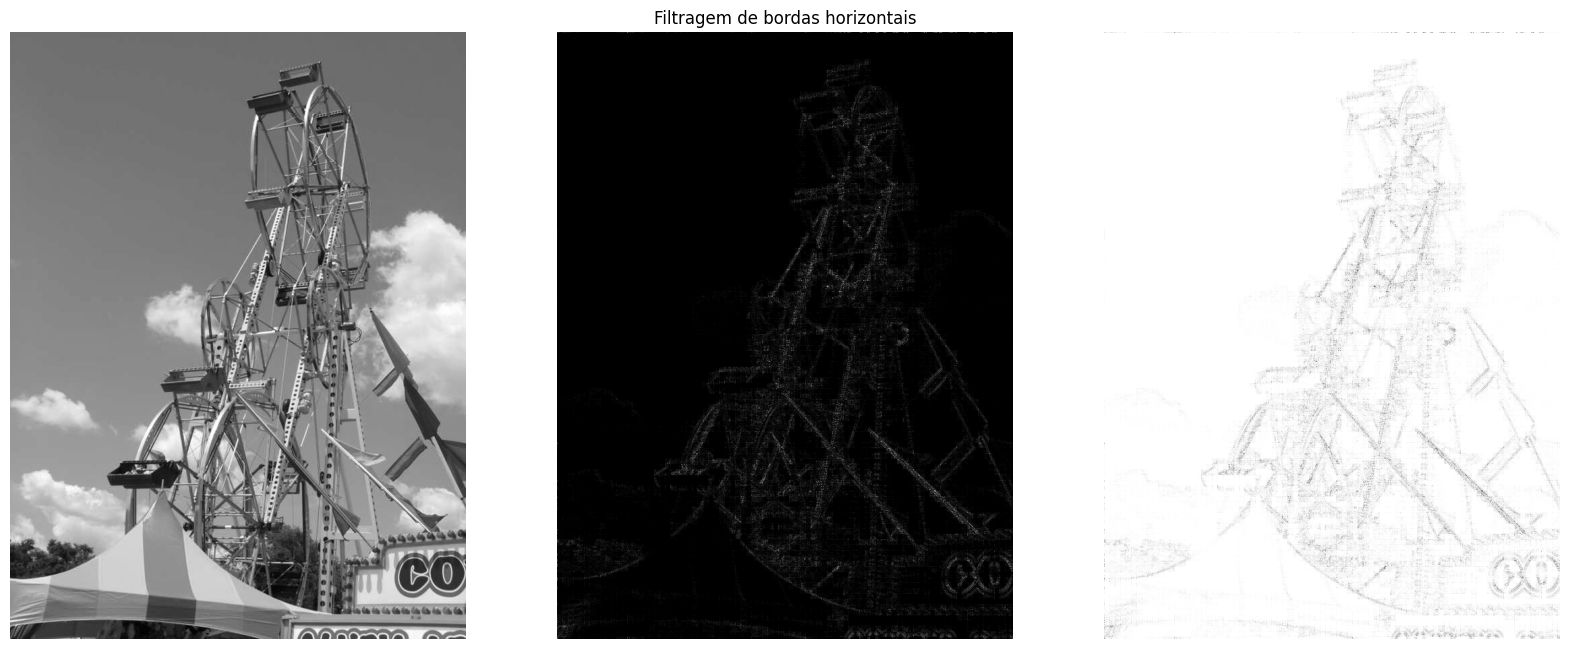

In [105]:
# original da aula
h = np.zeros((2,1));
h[0,0], h[1,0] = 1, -1;
print(f'h={h}')
Mhor = np.abs(sig.convolve2d(M,h,mode='same', boundary='wrap'))
# Mhor = np.abs(sig.convolve2d(Mhor,v,mode='same', boundary='wrap'))

maximo = np.amax(Mhor)
fig, ax = plt.subplots(1, 3, figsize=(20,12));
ax[0].imshow(M, cmap='gray');
ax[0].axis("off")
ax[1].imshow(1-Mhor/maximo,cmap='gray_r');
ax[1].axis("off")
ax[2].imshow(1-Mhor/maximo,cmap='gray');
ax[2].axis("off");ax[1].set_title("Filtragem de bordas horizontais");plt.show()

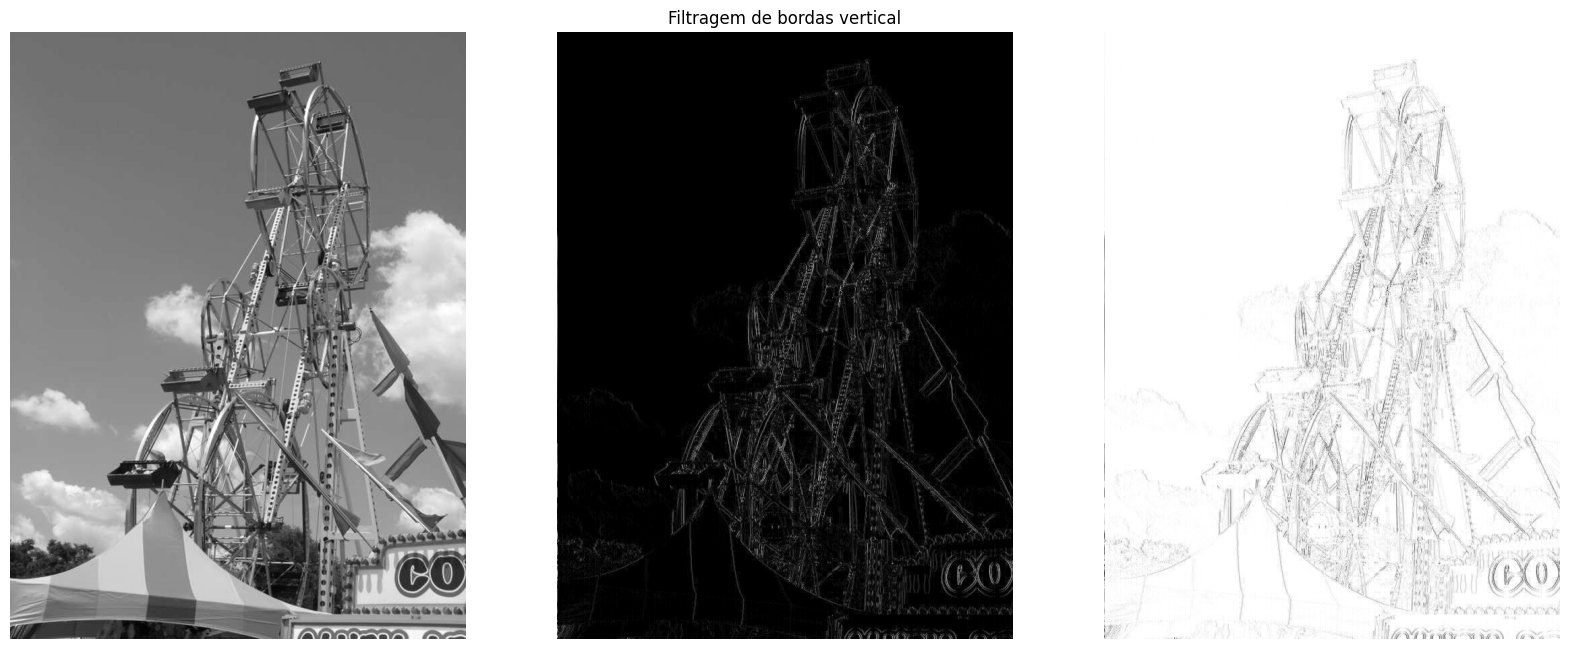

<Figure size 640x480 with 0 Axes>

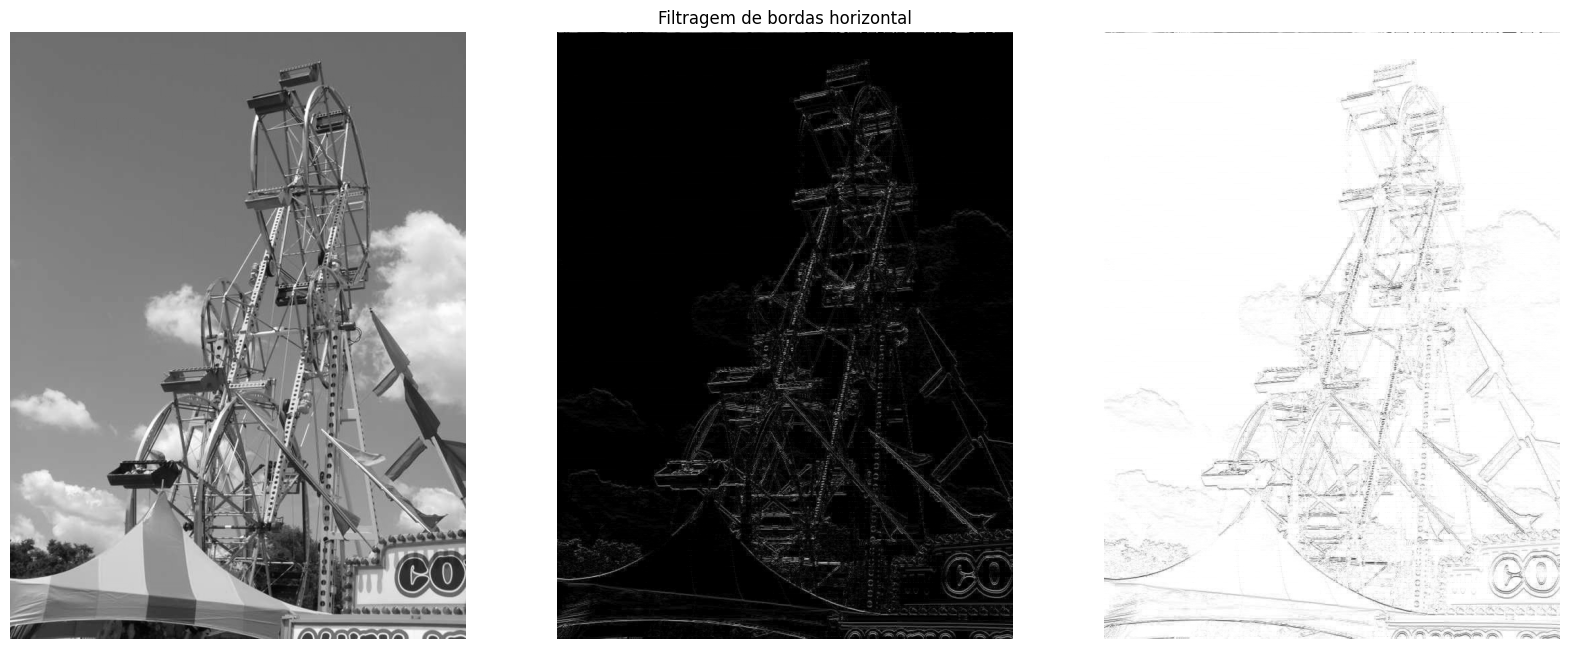

<Figure size 640x480 with 0 Axes>

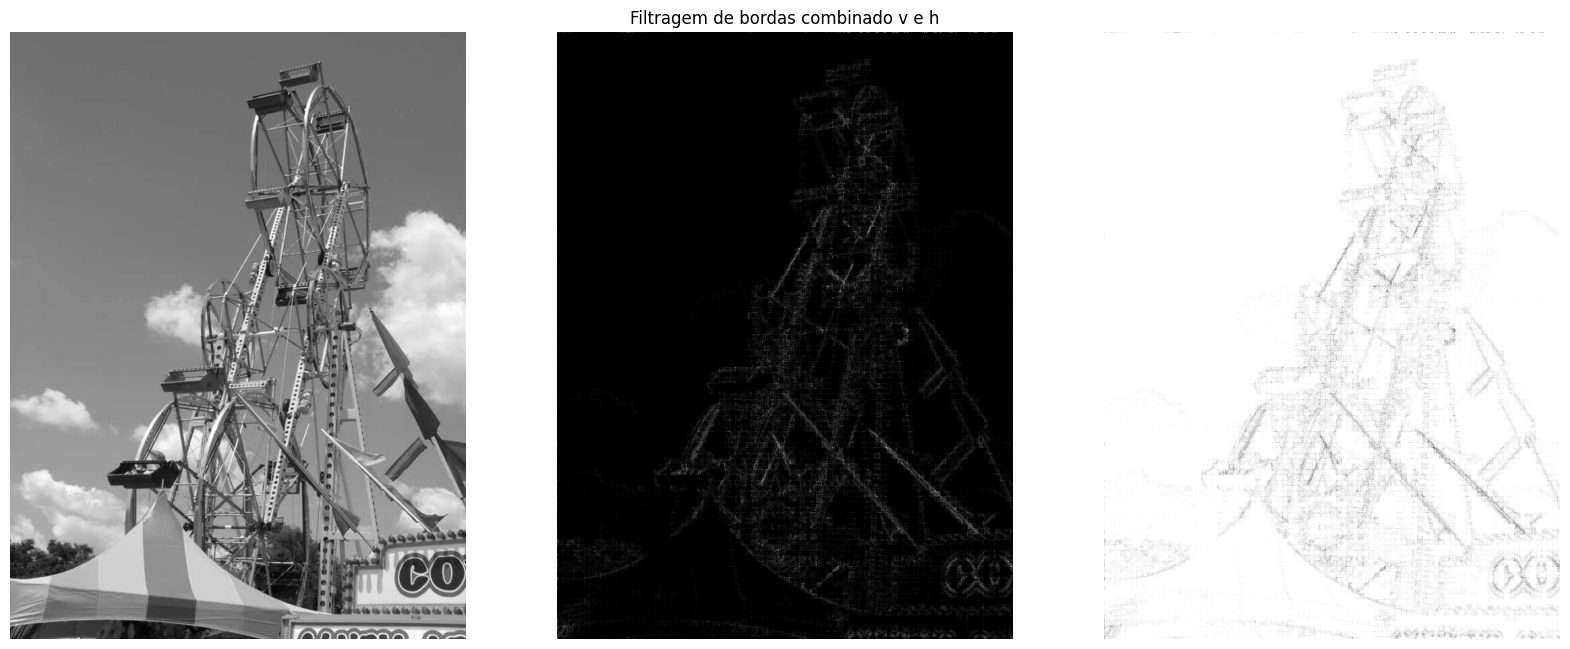

<Figure size 640x480 with 0 Axes>

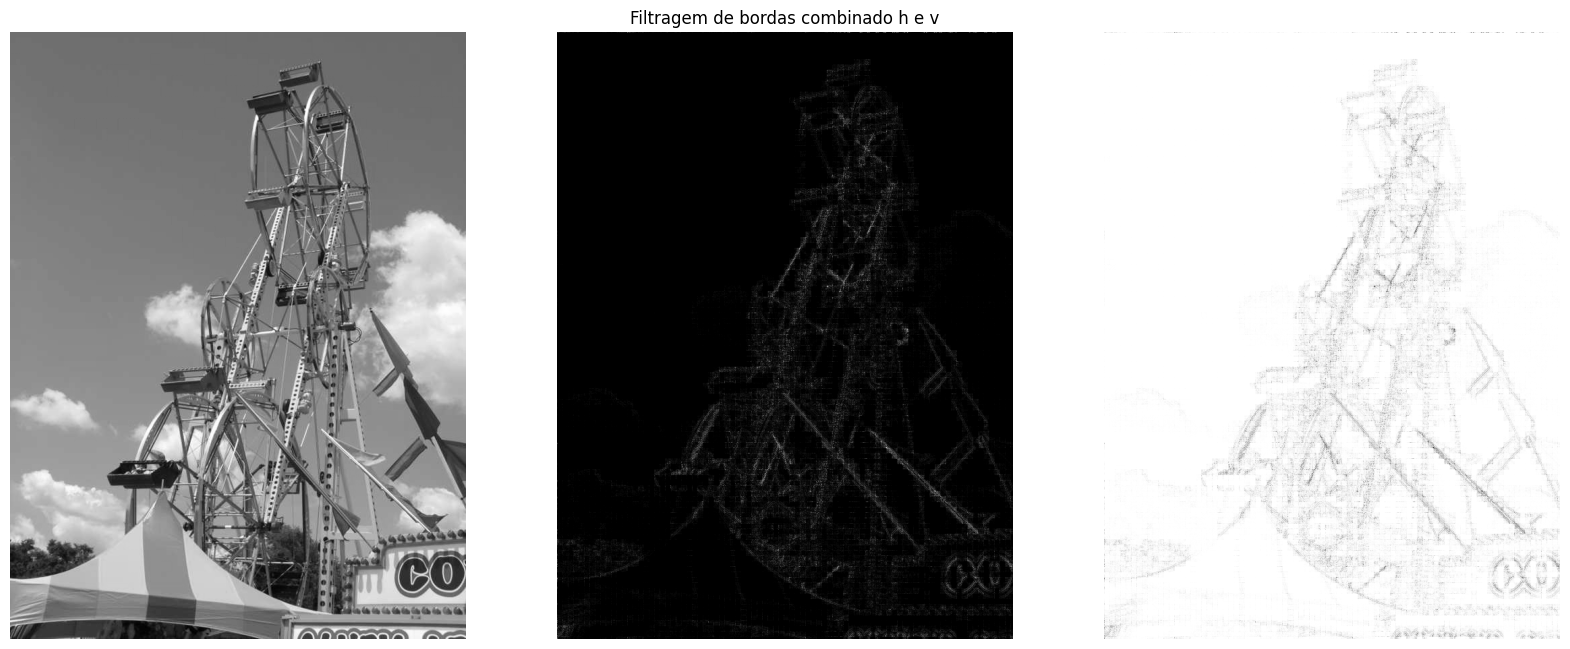

In [102]:
# teste
def detecta_bordas(src_image, tipo):
    M, N = src_image.shape
    h = filtro_detectcao_bordas(M,N, tipo)

    if tipo == 'combinado v e h':
        hh = filtro_detectcao_bordas(M,N, 'horizontal')
        hv = filtro_detectcao_bordas(M,N, 'vertical')
        h = ifft2(fft2(hh)*fft2(hv))
    elif tipo == 'combinado h e v':
        hh = filtro_detectcao_bordas(M,N, 'horizontal')
        hv = filtro_detectcao_bordas(M,N, 'vertical')
        h = ifft2(fft2(hv)*fft2(hh))
    else:
        h = filtro_detectcao_bordas(M,N, tipo)

    
    Mver = np.abs(convolução_circular2d_2(src_image,h))
    maximo = np.amax(Mver)
    fig, ax = plt.subplots(1, 3, figsize=(20,12))
    ax[0].imshow(src_image, cmap='gray')
    ax[0].axis("off")
    ax[1].imshow(1-Mver/maximo, cmap='gray_r')
    ax[1].axis("off")
    ax[2].imshow(1-Mver/maximo, cmap='gray')
    ax[2].axis("off")
    ax[1].set_title(f"Filtragem de bordas {tipo}")
    plt.show()
                  
detecta_bordas(M, 'vertical')
plt.figure()
detecta_bordas(M, 'horizontal')
plt.figure()
detecta_bordas(M, 'combinado v e h')
plt.figure()
detecta_bordas(M, 'combinado h e v')

In [119]:
# O que acontece se eu combinar as convoluções
width = height = 2
h_hor = filtro_detectcao_bordas(width,height, tipo='horizontal')
h_ver = filtro_detectcao_bordas(width,height, tipo='vertical')
h_combinado = ifft2(fft2(h_hor)*fft2(h_ver))
np.round(h_combinado,2)

array([[ 1.-0.j, -1.+0.j],
       [-1.+0.j,  1.+0.j]])

In [122]:
# mostrando o que acontece quando aplicamos esse filtro combinado convolução é uma imagem vertical

imagem_com_borda_vertical = np.zeros((width,height))
imagem_com_borda_vertical[0:height,0] = 1
imagem_com_borda_vertical = imagem_com_borda_vertical * 200
print(imagem_com_borda_vertical)
print('\nbordas verticais')
print(ifft2(fft2(imagem_com_borda_vertical)*fft2(h_ver)))

print('\nbordas horizontais')
print(ifft2(fft2(imagem_com_borda_vertical)*fft2(h_hor)))


print('\nbordas combinadas')
# print(ifft2(fft2(imagem_com_borda_vertical)*fft2(h_combinado)))
convolução_circular2d_1(imagem_com_borda_vertical, h_combinado, verbose=True)

[[200.   0.]
 [200.   0.]]

bordas verticais
[[ 200.-0.j -200.+0.j]
 [ 200.+0.j -200.+0.j]]

bordas horizontais
[[0.-0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

bordas combinadas

w[0][0] += x[.][0] * h[0][.] 	= 200.0 * (1-0j) = (200+0j) 
w[0][0] += x[.][1] * h[0][.] 	= 0.0 * (-1+0j) = (-0+0j) 
w[0][0] += x[.][0] * h[-1][.] 	= 200.0 * (-1+0j) = (-200+0j) 
w[0][0] += x[.][1] * h[-1][.] 	= 0.0 * (1+0j) = 0j 

w[0][1] += x[.][0] * h[0][.] 	= 200.0 * (-1+0j) = (-200+0j) 
w[0][1] += x[.][1] * h[0][.] 	= 0.0 * (1-0j) = 0j 
w[0][1] += x[.][0] * h[-1][.] 	= 200.0 * (1+0j) = (200+0j) 
w[0][1] += x[.][1] * h[-1][.] 	= 0.0 * (-1+0j) = (-0+0j) 

w[1][0] += x[.][0] * h[1][.] 	= 200.0 * (-1+0j) = (-200+0j) 
w[1][0] += x[.][1] * h[1][.] 	= 0.0 * (1+0j) = 0j 
w[1][0] += x[.][0] * h[0][.] 	= 200.0 * (1-0j) = (200+0j) 
w[1][0] += x[.][1] * h[0][.] 	= 0.0 * (-1+0j) = (-0+0j) 

w[1][1] += x[.][0] * h[1][.] 	= 200.0 * (1+0j) = (200+0j) 
w[1][1] += x[.][1] * h[1][.] 	= 0.0 * (-1+0j) = (-0+0j) 
w[1][1] += x[.][0] * h[0][

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

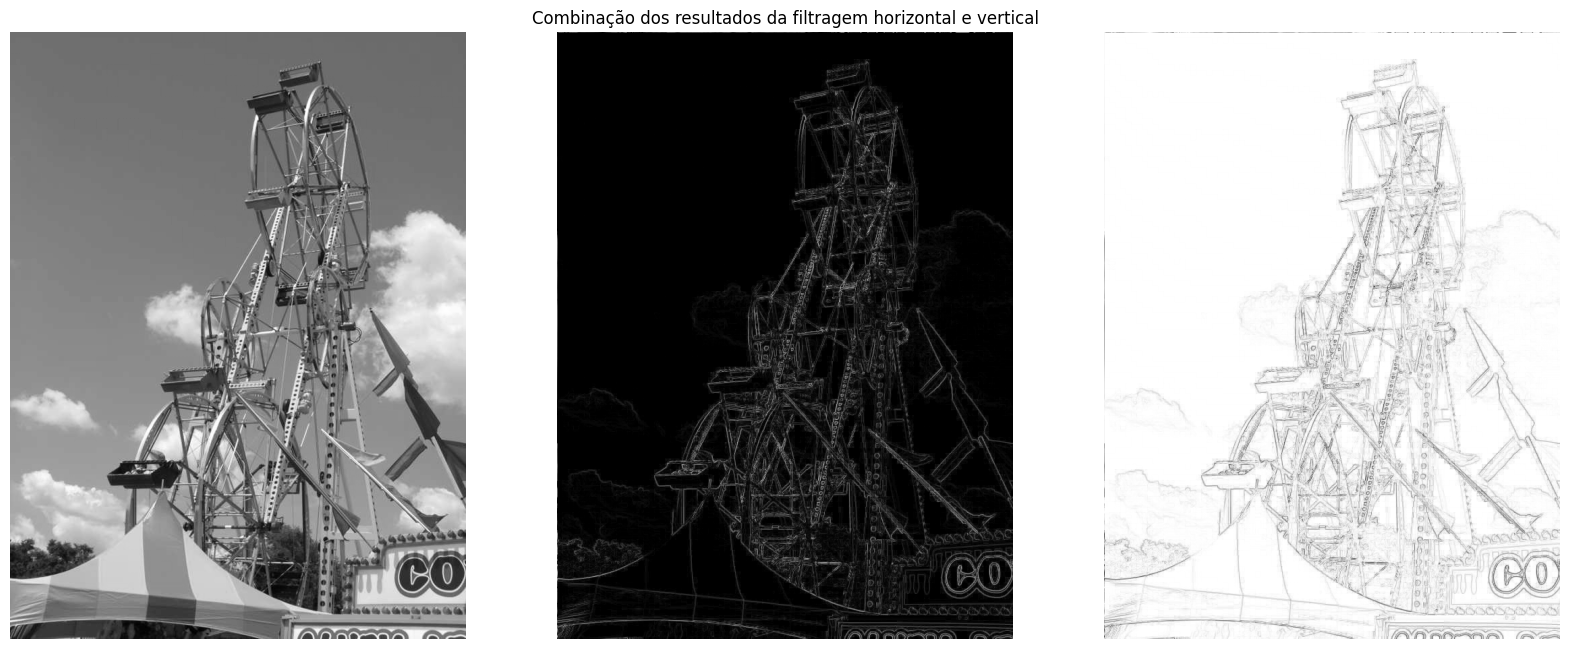

In [12]:
Mbordas = np.sqrt(Mhor**2+Mver**2);maximo = np.amax(Mbordas)
# bordas combinadas
fig, ax = plt.subplots(1, 3, figsize=(20,12));ax[0].imshow(M, cmap='gray');ax[0].axis("off")
ax[1].imshow(1-Mbordas/maximo, cmap='gray_r');ax[1].axis("off");
ax[2].imshow(1-Mbordas/maximo, cmap='gray');ax[2].axis("off");
ax[1].set_title("Combinação dos resultados da filtragem horizontal e vertical");plt.show()